In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
eda = pd.read_csv("/Users/grace//Downloads/Python_project_eda.csv")
expe = pd.read_csv("/Users/grace//Downloads/Python_project_experiment.csv")

In [7]:
eda.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [8]:
expe.head()

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,NaN,NaN,12624549,,0.0,3,16554430871838092438,NaN
1,NaN,NaN,12624548,,0.0,14,14411542309984779713,NaN
2,NaN,NaN,12624549,,0.0,20,8425202140671508556,NaN
3,NaN,NaN,12624549,,0.0,16,11302731652742770675,NaN
4,NaN,NaN,12624549,,0.0,14,1399243101040681867,NaN


In [9]:
exp_id = 12624548
con_id = 12624549

In [10]:
exp_table = expe[["date", "spend_usd"]][(expe.experiment_id == exp_id)]
exp_table.head()

,date,spend_usd
1,NaN,0.000000
6,NaN,0.000000
8,NaN,0.000000
11,NaN,0.000000
16,2017-04-02,0.975841


In [11]:
con_table = expe[["date", "spend_usd"]][(expe.experiment_id == con_id)]
con_table.head()

,date,spend_usd
0,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0
5,NaN,0.0


In [16]:
exp_mean = exp_table["spend_usd"].mean()
print(exp_mean)
con_mean = con_table["spend_usd"].mean()
print(con_mean)

3.1012323775663218
2.807224857586508


In [15]:
exp_var = exp_table["spend_usd"].var()
print(exp_var)
exp_std = exp_table["spend_usd"].std()
print(exp_std)

135.66395205730018
11.647486941709795


In [17]:
con_var = con_table["spend_usd"].var()
print(con_var)
con_std = con_table["spend_usd"].std()
print(con_std)

120.43490904733572
10.974283987911727


In [18]:
import math

In [19]:
n1 = len(exp_table)
n2 = len(con_table)
print(n1,n2)

24695 24471


In [20]:
sp = math.sqrt(((n1-1)*(exp_std**2)+(n2-1)*(con_std**2))/(n1+n2-2))
print(sp)
t_stat = (exp_mean-con_mean)/(sp*math.sqrt(1/n1+2/n2))
print(t_stat)
df = n1+n2-2
print(df)

11.317425664775403
2.349814450494485
49164


In [164]:
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="green", label="Group A")
    ax.plot(control_series, color="orange", label="Group B")
    ax.set_title("Group A vs. Group B Cumulative Revenue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()

In [165]:
expseries = np.cumsum(exp_table.groupby('date')['spend_usd'].sum())
conseries = np.cumsum(con_table.groupby('date')['spend_usd'].sum())

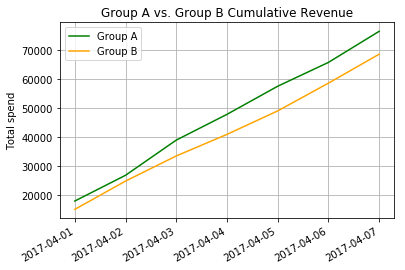

In [166]:
PlotSeries(expseries, conseries)

In [24]:
exprev = expseries[-1]
conrev = conseries[-1]
print(exprev, conrev, (exprev/conrev-1)*100)

76584.93356399973 68695.59948999969 11.484482459678546


In [25]:
print(exp_mean, con_mean, (exp_mean/con_mean - 1)*100)

3.1012323775663218 2.807224857586508 10.4732443924205


In [163]:
eda_fop = eda[["user_added_fop"]][(eda.user_added_fop == 1)]
print(eda_fop.count())
non_fop = eda.user_added_fop.count()- eda_fop.count()
print(non_fop)
n = non_fop/(eda_fop.count() + non_fop)*100
print(n)

user_added_fop    170597
dtype: int64
user_added_fop    396102
dtype: int64
user_added_fop    69.896365
dtype: float64


In [158]:
t = eda[["clicked_buy_before","spend_usd_next_14_days","user_added_credit_card","user_added_dcb","user_added_gift_card","user_added_paypal"]][(eda.user_added_fop == 1)]
t['fop_count'] = t['user_added_credit_card'] + t['user_added_dcb'] + t['user_added_gift_card'] + t['user_added_paypal']

t1 = t['fop_count'][(t.fop_count == 1)].count()
t2 = t['fop_count'][(t.fop_count == 2)].count()
t3 = t['fop_count'][(t.fop_count == 3)].count()
t4 = t['fop_count'][(t.fop_count == 4)].count()

print(t1, t1 / eda.user_added_fop.count() *100)
print(t2, t2 / eda.user_added_fop.count() *100)
print(t3, t3 / eda.user_added_fop.count() *100)
print(t4, t4 / eda.user_added_fop.count() *100)

125217 22.09585688346018
37932 6.6935004296813645
6877 1.2135189933280277
570 0.10058249617521825


In [142]:
rev_total = eda.spend_usd_next_14_days.sum()
rev_total

6037156.480382

In [149]:
rev_1 = t["spend_usd_next_14_days"][(t.fop_count == 1)].sum()
print(rev_1/rev_total*100)
rev_2 = t["spend_usd_next_14_days"][(t.fop_count == 2)].sum()
print(rev_2/rev_total*100)
rev_3 = t["spend_usd_next_14_days"][(t.fop_count == 3)].sum()
print(rev_3/rev_total*100)
rev_4 = t["spend_usd_next_14_days"][(t.fop_count == 4)].sum()
print(rev_4/rev_total*100)

42.447478996450506
42.15545650342272
13.243081690660624
1.0016931362059631


In [150]:
click = eda.clicked_buy_before.count()
click

495640

In [156]:
click1 = t["clicked_buy_before"][(t.fop_count == 1)].count()
print(click1 / click * 100)
click2 = t["clicked_buy_before"][(t.fop_count == 2)].count()
print(click2 / click * 100)
click3 = t["clicked_buy_before"][(t.fop_count == 3)].count()
print(click3 / click * 100)
click4 = t["clicked_buy_before"][(t.fop_count == 4)].count()
print(click4 / click * 100)

23.516060043580016
7.412234686465983
1.366717779033169
0.11480106528932289
